The cetres reference set 2 is used to create a training and test set for cell and mitosis detection. 

The bounding boxes for all cells are created using the cell masks from the cetres.b data set. The bounding boxes for all mitoses are loaded as .json file. 

In this notebook 
* create bounding boxes for all cells inlcuding mitotic cells (dictionary cellBoxes with key = filename)
* load bounding boxes for all mitotic cells (dictionary mitosesBoxes with key = filename)
* identify all mitotic cells in cellBoxes and change the label from "cell" to "mitotsis"

In [1]:
%matplotlib notebook 

import csv
import json
import numpy 
import os
import sys
import time

import skimage.color
import skimage.io
import skimage.measure
import skimage.transform

import matplotlib.patches
import matplotlib.path
import matplotlib.pyplot
import matplotlib.transforms

Functions to access the reference data (images as well as labels). Regions properties are generated using skimage.measure()

In [2]:
imageDir = '../data/cetres.b/'
labelDir = '../data/mask/'


# load image given the image number
def loadImage(frameNr, imageDir):
    image = skimage.io.imread(imageDir + frame2ImageName(frameNr))
    return skimage.color.rgb2gray(image)

# load image given the image number
def loadLabel(frameNr, imageDir):
    data = numpy.genfromtxt(imageDir + frame2LabelName(frameNr), dtype=int, delimiter=',')
    return data

def frame2ImageName(frameNr):
    return('refdataB_C2_' + "%03i.png" % (frameNr,))

def frame2LabelName(frameNr):
     return('refdataB_' + "%03i.txt" % (frameNr,))

def label2regionprops(labelDir, frameNr, offset):
    L = loadLabel(frameNr, labelDir)
    labels = skimage.measure.label(L)
    return(skimage.measure.regionprops(labels))


# json file used for export 
fileOut = '2017_cetres_samples.json'


Generate all bounding boxes for all cell masks given in CeTReS B. offset defines the number of pixel the bounding box is increased in each direction (size of bbox is increased by 2*offset) 

In [8]:
offset = 12
count = 0
cellBBoxes = {}
for frame in range(1,400):
    for region in label2regionprops(labelDir, frame, offset):
        count = count + 1
        try: cellBBoxes[frame2ImageName(frame)].append(region.bbox)
        except: cellBBoxes[frame2ImageName(frame)] = [region.bbox ]
print(count)

KeyboardInterrupt: 

In [3]:
frameNr = 5
print(cellBBoxes[frame2ImageName(frameNr)])
bboxes = cellBBoxes[frame2ImageName(frameNr)]



NameError: name 'cellBBoxes' is not defined

<IPython.core.display.Javascript object>


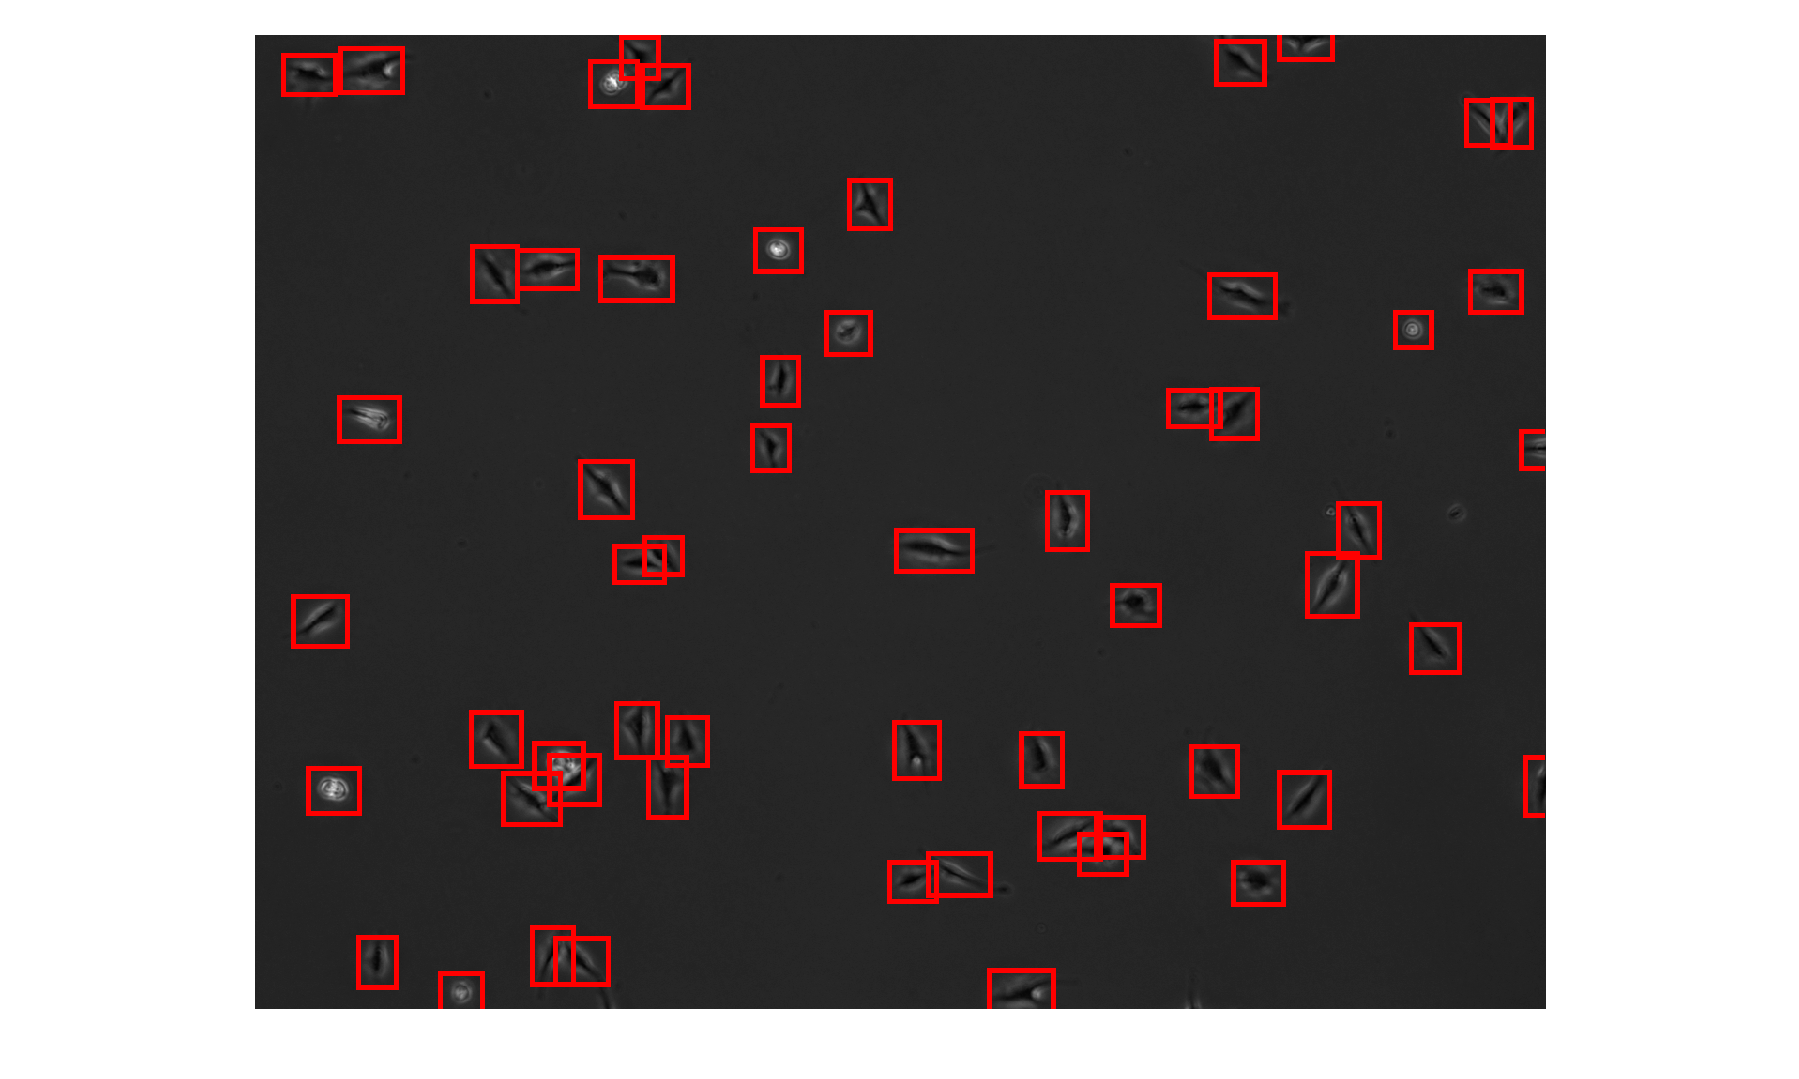

In [4]:
offset = 12
frameNr = 100

I = loadImage(frameNr, imageDir)

fig, ax = matplotlib.pyplot.subplots(figsize=(10, 6))
ax.imshow(I,cmap="gray")

for region in label2regionprops(labelDir, frameNr, offset):
    # take regions with large enough areas
    if region.area >= 10:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = matplotlib.patches.Rectangle((minc - offset, minr - offset), maxc - minc + 2*offset, 
                                            maxr - minr + 2*offset, fill = False, edgecolor = 'red', 
                                            linewidth = 2)
        ax.add_patch(rect)

ax.set_axis_off()
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [ ]:
# code from here
# https://stackoverflow.com/questions/25349178/calculating-percentage-of-bounding-box-overlap-for-image-detector-evaluation
def clip_boxes(box0, box1):
    path_coords = numpy.array([[box0[0, 0], box0[0, 1]],
                            [box0[1, 0], box0[0, 1]],
                            [box0[1, 0], box0[1, 1]],
                            [box0[0, 0], box0[1, 1]]])

    poly = matplotlib.path.Path(numpy.vstack((path_coords[:, 0],
                                path_coords[:, 1])).T, closed=True)
    clip_rect = matplotlib.transforms.Bbox(box1)

    poly_clipped = poly.clip_to_bbox(clip_rect).to_polygons()[0]

    return numpy.array([numpy.min(poly_clipped, axis=0),
                     numpy.max(poly_clipped, axis=0)])

box1 = numpy.array([[0, 0], [30, 30]])
box0 = numpy.array([[20, 10], [30, 30]])

print(clip_boxes(box0, box1))



In [ ]:
# load boxes for all mitotic cells 
mitosisSamples = json.load(open('../../../../mitosis/json_files/all_samples.json') )

mitosisSamples = {}
for ms in mitosisSamples:
    for box in ms["boxes"]:
        try: boxes_in_images[ms["filename"]].append(box)
        except: boxes_in_images[ms["filename"]] = [ box ]
#print(boxes_in_images)

for filename in boxes_in_images.keys():
    allBoxes = boxes_in_images[filename]
    #print(filename, allBoxes)
    #mitoticBoxes
    
print(boxes_in_images)